# Capstone Project

## Introduction

This capstone project is designed to integrate the various concepts and techniques learned throughout the course. The task is to be a Data Scientist at Spotify that is given a dataset and is looking to understand what factors go into making a song popular and the what audio features may up a genre

### Objective
The primary goal of this analysis is to explore and identify key insights from a dataset of 52,000 songs. 
- Want to determine the features that influence a song's popularity
- Create figures to display results of analysis
- Clean and process data
- Analyze the audio characteristics that differentiate music genres.

### Dataset Description
The dataset used in this analysis consists of 52,000 songs with various attributes, including:
- **Popularity**: An integer value from 0 to 100 representing how popular a song is on Spotify.
- **Duration**: The length of the song in milliseconds.
- **Audio Features**: Attributes like danceability, energy, loudness, and tempo, among others.
- **Genre**: The genre of the song, with 1,000 songs sampled from each genre.
- **SongNumber**: The track ID of the song
- **Track Name**: Name of track corresponding to the track ID 

The project also has a file that contains feedback in the form of star ratings from 10,000 users on 5,000 songs. Each row corresponds to a user and each column is a song, so the first 5,000 songs of the 52,000 song dataset in the same order. Ratings go from 0 to 4, where 0 is low and 4 is highly rated.

### Approach
This project is structured around answering 10 specific questions related to the dataset. Each question is addressed with a combination of statistical analysis, visualizations, and machine learning models, as appropriate. The analysis includes data preprocessing steps such as handling missing data, dealing with duplicates, and feature engineering. A bonus extra credit is included at the end. 

### Tools and Methods
We will utilize Python and libraries such as Pandas, NumPy, Scikit-learn, and TensorFlow for data manipulation, statistical analysis, and machine learning. Visualizations are created using Matplotlib and Seaborn to aid in the interpretation of results.

By the end of this project, we aim to uncover actionable insights that could potentially influence music recommendation systems or marketing strategies for Spotify.

### Data Preparation

In this section, we load the dataset and handle duplicate records. The dataset contains various attributes for 52,000 songs, including popularity scores, audio features, and genres. We first identify and remove duplicate records to ensure the integrity of our analysis.

#### Handling Duplicates
Two approaches are used to identify duplicates:
1. Took the original dataset as is and looked at all the columns to remove duplicates if all rows are equal.
2. Noticed that some songs are the exact same but under two genres. So same song had two records with everything equal but genre. Made an additional dataframe with genre ingnored to delete duplicates in that way so songs won't be double counted for the analysis.

The cleaned datasets are saved to CSV files for future use, and the number of unique records is reported.


In [10]:
# Import needed libraries

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC



In [11]:
# Random seed for reproducibility
np.random.seed(10206068)
random.seed(10206068)

# Load the dataset
csv_file = 'spotify52kData.csv'
df = pd.read_csv(csv_file)

# Find duplicate rows
duplicate_rows = df[df.duplicated()]


# Output files for processed data
output_csv = 'output.csv'
dups_csv = 'dups.csv'
output_ignore_genre = 'output_ig.csv'
dups_ignore_g = 'dups_ig.csv'


# These are all of the columns that we can consider for the analysis
columns_to_consider = ['artists', 'album_name',	'track_name', 'popularity',	'duration',	'explicit',
                       'danceability', 'energy', 'key',	'loudness',	'mode',	'speechiness',	'acousticness',
                       'instrumentalness',	'liveness',	'valence', 'tempo',	'time_signature', 'track_genre']


# Same as above but does not include the track_genre column 
col_to_consider_2 = ['artists', 'album_name',	'track_name', 'popularity',	'duration',	'explicit',
                       'danceability', 'energy', 'key',	'loudness',	'mode',	'speechiness',	'acousticness',
                       'instrumentalness',	'liveness',	'valence', 'tempo',	'time_signature']

# Handling duplicates considering all columns
dups = df[df.duplicated(subset=columns_to_consider, keep=False)]
df_no_dups = df.drop_duplicates(subset=columns_to_consider, keep='first')

# Handling duplicates but ignore track_genre column (ig = ignore genre)
dups_ignore_genre = df[df.duplicated(subset=col_to_consider_2, keep=False)]
df_no_dups_ig = df.drop_duplicates(subset=col_to_consider_2, keep='first')


pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 20)

#Save processed dataframes to CSV files
df_no_dups.to_csv(output_csv, index=False)
dups.to_csv(dups_csv, index=False)

df_no_dups_ig.to_csv(output_ignore_genre, index=False)
dups_ignore_genre.to_csv(dups_ignore_g, index=False)

# Output number of records after removing duplicates
print("Number of records no duplicates with genre difference: " + str(len(df_no_dups_ig)))

Number of records no duplicates with genre difference: 45987


## Exploratory Data Analysis (EDA)

**Question 1**: Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

Question 1: Song length and popularity


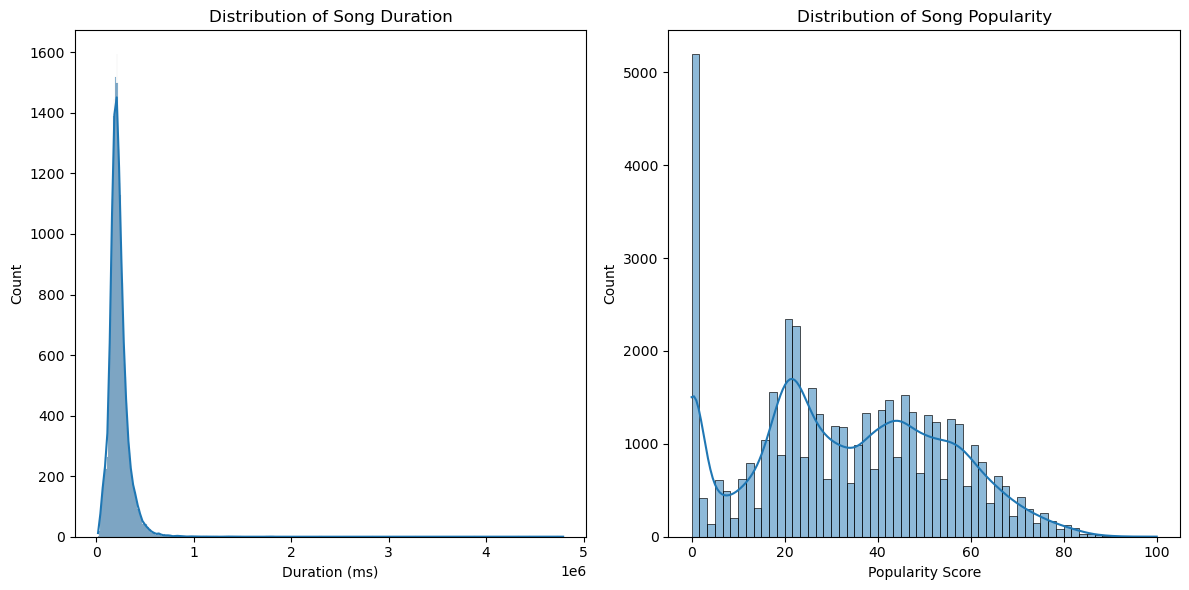

The correlation coefficient between duration and popularity: -0.0543
P-value: 2.149816227811565e-31


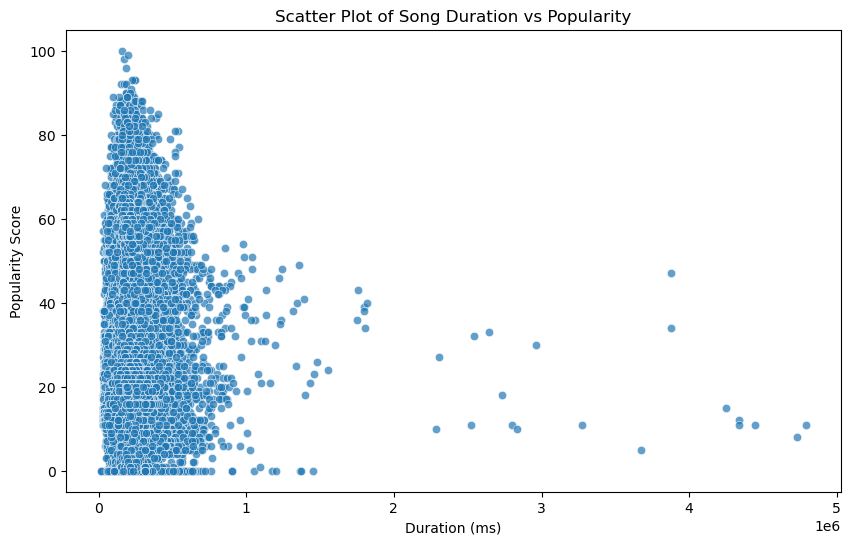

In [21]:
print("Question 1: Song length and popularity")

# Remove records that have missing values for duration and popularity
eda_data = df_no_dups_ig.dropna(subset=['duration', 'popularity'])


duration_popularity_corr, p_value_corr = spearmanr(eda_data['duration'], eda_data['popularity'])


plt.figure(figsize=(12, 6))

# Plot the distribution of song duration
plt.subplot(1, 2, 1)
sns.histplot(eda_data['duration'], kde=True)
plt.title('Distribution of Song Duration')
plt.xlabel('Duration (ms)')

# Plot the distribution of song popularity
plt.subplot(1, 2, 2)
sns.histplot(eda_data['popularity'], kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')

plt.tight_layout()
plt.show()

print(f"The correlation coefficient between duration and popularity: {duration_popularity_corr:.4f}")
print(f"P-value: {p_value_corr}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=eda_data, x='duration', y='popularity', alpha=0.7)
plt.title('Scatter Plot of Song Duration vs Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity Score')
plt.show()

## Analysis of Explicit Content and Popularity

**Question 2**: Are explicitly rated songs more popular than songs that are not explicit?

Question 2:
Average popularity of explicit songs: 35.86
Average popularity of non-explicit songs: 32.96


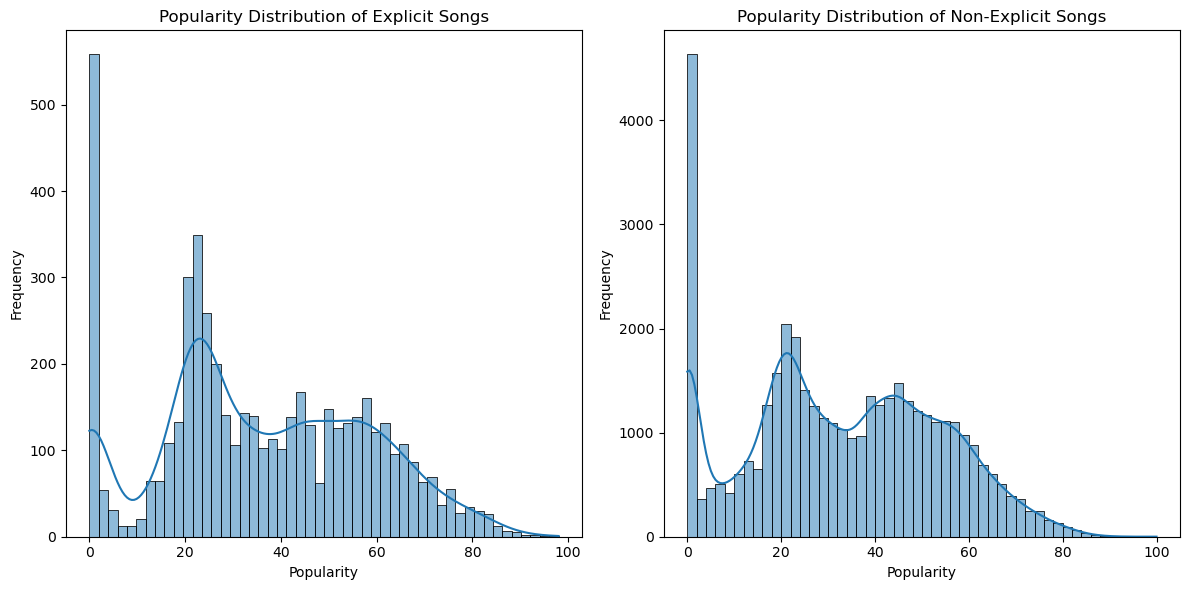

Mann-Whitney U test statistic: 112448765.5, p-value: 1.1076841856421136e-17
Cohen's d: 0.13620149550461752
Bootstrap confidence interval for the mean difference: (2.268264462176165, 3.5432631948821376)


In [25]:
print("Question 2:")

#Separate popularity data based on explicit content
explicit_popularity = df_no_dups_ig[df_no_dups_ig['explicit'] == True]['popularity']
non_explicit_popularity = df_no_dups_ig[df_no_dups_ig['explicit'] == False]['popularity']

# Calculating mean popularity for explicit and non-explicit songs
explicit_mean = explicit_popularity.mean()
non_explicit_mean = non_explicit_popularity.mean()

print(f"Average popularity of explicit songs: {explicit_mean:.2f}")
print(f"Average popularity of non-explicit songs: {non_explicit_mean:.2f}")




plt.figure(figsize=(12, 6))

#Histogram explicit songs
plt.subplot(1, 2, 1)
sns.histplot(explicit_popularity, kde=True, bins=50)
plt.title('Popularity Distribution of Explicit Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

#Histogram for non-explicit songs
plt.subplot(1, 2, 2)
sns.histplot(non_explicit_popularity, kde=True, bins=50)
plt.title('Popularity Distribution of Non-Explicit Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Conduct Mann_Whitney U test to compare popularity distribution 
u_stat_2, p_value_2 = mannwhitneyu(explicit_popularity, non_explicit_popularity)

print("Mann-Whitney U test statistic: " + str(u_stat_2) + ", p-value: " + str(p_value_2))

# Calculate standard deviation
std_explicit = np.std(explicit_popularity, ddof=1)
std_non_explicit = np.std(non_explicit_popularity, ddof=1)

#Cohen's d to measure the effect size
cohen_d_2 = (explicit_mean - non_explicit_mean) / np.sqrt((std_explicit ** 2 + std_non_explicit ** 2) / 2)


print(f"Cohen's d: {cohen_d_2}")

# Bootstrap confidence interval for the mean difference
def bootstrap_mean_diff(data1, data2, n_bootstrap=50000):
    bootstrap_diffs = []
    for i in range(n_bootstrap):
        bootstrap_sample1 = np.random.choice(data1, size=len(data1), replace=True)
        bootstrap_sample2 = np.random.choice(data2, size=len(data2), replace=True)
        bootstrap_diffs.append(np.mean(bootstrap_sample1) - np.mean(bootstrap_sample2))
    lower, upper = np.percentile(bootstrap_diffs, [2.5, 97.5])
    return lower, upper

# Calculating the bootstrap confidence interval
bootstrap_ci = bootstrap_mean_diff(explicit_popularity, non_explicit_popularity)

print(f"Bootstrap confidence interval for the mean difference: " + str(bootstrap_ci))

**Question 3**: Are songs in major key more popular than songs that are not explicit

Question 3:
Average popularity of major key songs: 32.88394282145583
Average popularity of minor key songs: 33.95024759685406


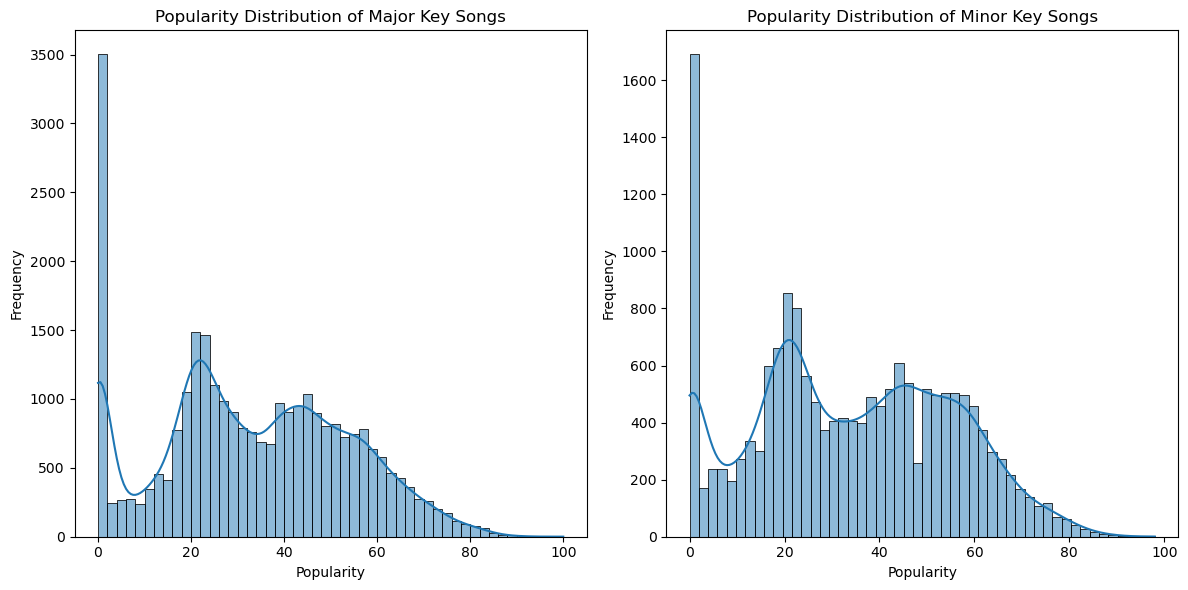

Mann-Whitney U test statistic: 240731441.5, p-value: 1.4327297732663738e-06
Cohen's d is: -0.05117737711401087


In [30]:
print("Question 3:")

#Separate songs based on song mode looking at popularity
major_key_popularity = df_no_dups_ig[df_no_dups_ig['mode'] == 1]['popularity']
minor_key_popularity = df_no_dups_ig[df_no_dups_ig['mode'] == 0]['popularity']

average_popularity_major = major_key_popularity.mean()
average_popularity_minor = minor_key_popularity.mean()

print("Average popularity of major key songs: " + str(average_popularity_major))
print("Average popularity of minor key songs: " + str(average_popularity_minor))


plt.figure(figsize=(12, 6))

# Histogram major key songs
plt.subplot(1, 2, 1)
sns.histplot(major_key_popularity, kde=True, bins=50)
plt.title('Popularity Distribution of Major Key Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

#Histogram for minor key songs
plt.subplot(1, 2, 2)
sns.histplot(minor_key_popularity, kde=True, bins=50)
plt.title('Popularity Distribution of Minor Key Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Conducting the Mann-Whitney U test to compare popularity distributions
u_stat_3, p_value_3 = mannwhitneyu(major_key_popularity, minor_key_popularity)

cohen_d_3 = (average_popularity_major - average_popularity_minor) / df_no_dups_ig['popularity'].std(ddof=1)

print("Mann-Whitney U test statistic: " + str(u_stat_3) + ", p-value: " + str(p_value_3))
print("Cohen's d is: " + str(cohen_d_3))

## Analysis of the Relationship between Individual Features and Popularity

**Question 4**: Which of the following 10 song features: duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo predicts popularity best? How good is this model?

In [37]:
print("Question 4")

features_to_analyze = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo']
target_variable = 'popularity'
linear_regression_results = {}


# Loop through each feature to analyze its relationship with popularity
for feature in features_to_analyze:

    X_feature = df_no_dups_ig[[feature]]
    y_popularity = df_no_dups_ig[target_variable]

    x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(X_feature, y_popularity, test_size = 0.15, random_state=10206068)

    # Initialize and train the Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(x_train_4, y_train_4)

    # Make predictions on the test set
    y_pred_4 = linear_model.predict(x_test_4)

    # Calculate R-squared and RMSE for the model
    r_squared_4 = linear_model.score(x_test_4, y_test_4)
    rmse_4 = np.sqrt(mean_squared_error(y_test_4, y_pred_4))

    linear_regression_results[feature] = {'R_Squared': r_squared_4, 'RMSE': rmse_4}

for feature, result in linear_regression_results.items():
    print("Feature: " + str(feature) + ", R^2: " + str(result['R_Squared']) + ", RMSE: " + str(result['RMSE']))



Question 4
Feature: duration, R^2: 0.004017072484190587, RMSE: 20.8412039352474
Feature: danceability, R^2: 0.000723082607665515, RMSE: 20.875639287925758
Feature: energy, R^2: 0.0052260850540667425, RMSE: 20.82855064162613
Feature: loudness, R^2: 0.002818040326941995, RMSE: 20.85374519303395
Feature: speechiness, R^2: 0.0034675988340293618, RMSE: 20.84695208266725
Feature: acousticness, R^2: 0.0012762518954030355, RMSE: 20.869860428792766
Feature: instrumentalness, R^2: 0.02481794949902205, RMSE: 20.622423711116447
Feature: liveness, R^2: 0.0034977855841267225, RMSE: 20.846636334530103
Feature: valence, R^2: 0.0007868192170498167, RMSE: 20.874973524681923
Feature: tempo, R^2: -0.000383997804550118, RMSE: 20.88719995415545


## Modeling

**Question 5**: Building a model that uses *all* of the song features mentioned in question 1, how well can you
predict popularity? How much (if at all) is this model improved compared to the model in question
4). How do you account for this? What happens if you regularize your model?

In [44]:
print("Question 5")

features_regression = df_no_dups_ig[['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo']]
target_popularity = df_no_dups_ig['popularity']

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(features_regression, target_popularity,
                                                                    test_size=0.15, random_state=10206068)
# Initializing and fitting a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train_reg, y_train_reg)
y_pred_linear_reg = linear_reg_model.predict(x_test_reg)

# Evaluating the Linear Regression model performance
print("Linear Regression Model Performance")
print("R-squared:", r2_score(y_test_reg, y_pred_linear_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_linear_reg)))

ridge_reg_model = Ridge().fit(x_train_reg, y_train_reg)
lasso_reg_model = Lasso().fit(x_train_reg, y_train_reg)

y_pred_ridge_reg = ridge_reg_model.predict(x_test_reg)
y_pred_lasso_reg = lasso_reg_model.predict(x_test_reg)

print("Ridge Regression")
print("R²:", r2_score(y_test_reg, y_pred_ridge_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge_reg)))

print("Lasso Regression")
print("R²:", r2_score(y_test_reg, y_pred_lasso_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lasso_reg)))

Question 5
Linear Regression Model Performance
R-squared: 0.05567437797934649
RMSE: 20.293536778397122
Ridge Regression
R²: 0.05567322142529252
RMSE: 20.293549205553866
Lasso Regression
R²: 0.006523791799635359
RMSE: 20.814960532794633


## Principal Component Analysis (PCA) and K-Means Clustering

**Question 6**: When considering the 10 song features in the previous question, how many meaningful principal
components can you extract? What proportion of the variance do these principal components
account for? Using these principal components, how many clusters can you identify? Do these
clusters reasonably correspond to the genre labels in column 20 of the data?

Question 6


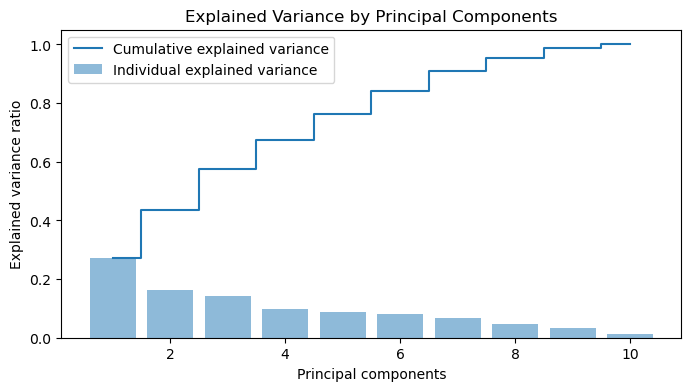

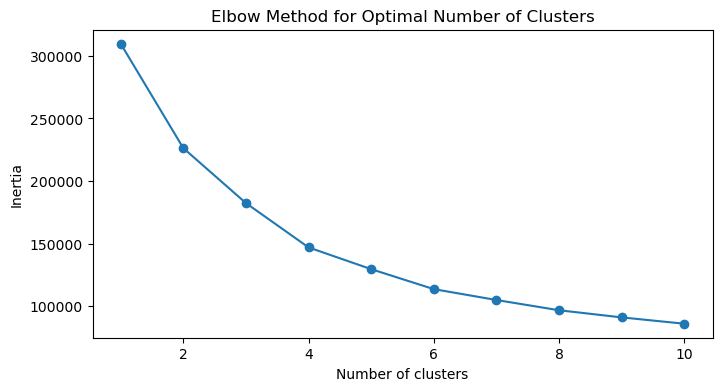

track_genre  acoustic  afrobeat  alt-rock  alternative  ambient  anime  \
cluster                                                                  
0                 367       780       475          244       29    353   
1                 134       141       474          136       88    405   
2                 499        78        44           27      882    237   

track_genre  black-metal  bluegrass  blues  brazil  ...  grindcore  groove  \
cluster                                             ...                      
0                      9        551    553     488  ...         13     251   
1                    952        135    175     330  ...        964     342   
2                     35        312    207     119  ...          8      43   

track_genre  grunge  guitar  happy  hard-rock  hardcore  hardstyle  \
cluster                                                              
0               170     225    116        234       348        101   
1               670      42 

In [53]:
print("Question 6")

features_for_pca = df_no_dups_ig[features_to_analyze]

# Standardizing the features before applying PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_pca)

# Performing PCA to reduce dimensionality
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

# Extracting explained variance ratios and calculating cumulative variance
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratios.cumsum()

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Selecting the number of principal components that explain the majority of variance
n_components = 4
features_pca_reduced = features_pca[:, :n_components]

inertia_values = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10206068)
    kmeans.fit(features_pca_reduced)
    inertia_values.append(kmeans.inertia_)


# Plotting the Elbow Method to determine the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Make sure it is a copy 
df_no_dups_ig = df_no_dups_ig.copy()

# Based on the Elbow plot, selecting the optimal number of clusters
n_clusters_optimal = 3
kmeans_final = KMeans(n_clusters=n_clusters_optimal, random_state=10206068)
cluster_labels = kmeans_final.fit_predict(features_pca_reduced)

# Assigning cluster labels to the original DataFrame
df_no_dups_ig['cluster'] = cluster_labels
genre_cluster_correspondence = pd.crosstab(df_no_dups_ig['cluster'], df_no_dups_ig['track_genre'])

print(genre_cluster_correspondence)

### Classification of Song Mode Using Valence

**Question 7**: Can you predict whether a song is in major or minor key from valence using logistic regression or a
support vector machine? If so, how good is this prediction? If not, is there a better one?

In [61]:
print('Question 7')

x_7 = df_no_dups_ig[['valence']]
y_7 = df_no_dups_ig['mode']

# Standardizing the feature to have a mean of 0 and a standard deviation of 1
scalar_7 = StandardScaler()
x_scaled_7 = scalar_7.fit_transform(x_7)

# Splitting the data into training and testing sets (85% train, 15% test)
x_train_7, x_test_7, y_train_7, y_test_7 = train_test_split(x_scaled_7, y_7, test_size=0.15, random_state=10206068)

# Initializing and training a Logistic Regression model with balanced class weights
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(x_train_7, y_train_7)

# Initializing and training a Support Vector Machine (SVM) model with balanced class weights
svm = SVC(probability=True, class_weight='balanced')
svm.fit(x_train_7, y_train_7)

# Making predictions on the test set using both models
y_pred_logreg = logreg.predict(x_test_7)
y_pred_svm = svm.predict(x_test_7)

print("Logistic Regression classification report:")
print(classification_report(y_test_7, y_pred_logreg))

print("Support Vector Machine classification report:")
print(classification_report(y_test_7, y_pred_svm))

accuracy_logreg = accuracy_score(y_test_7, y_pred_logreg)
accuracy_svm = accuracy_score(y_test_7, y_pred_svm)

print("Logistic Regression accuracy: " + str(accuracy_logreg))
print("Support Vector Machine accuracy: " + str(accuracy_svm))

Question 7
Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.37      0.52      0.43      2592
           1       0.62      0.47      0.53      4307

    accuracy                           0.49      6899
   macro avg       0.50      0.50      0.48      6899
weighted avg       0.53      0.49      0.50      6899

Support Vector Machine classification report:
              precision    recall  f1-score   support

           0       0.38      0.48      0.43      2592
           1       0.63      0.53      0.57      4307

    accuracy                           0.51      6899
   macro avg       0.51      0.51      0.50      6899
weighted avg       0.54      0.51      0.52      6899

Logistic Regression accuracy: 0.48876648789679666
Support Vector Machine accuracy: 0.510798666473402


## Neural Network Classification

**Question 8**: Can you predict genre by using the 10 song features from question 4 directly or the principal
components you extracted in question 6 with a neural network? How well does this work?

In [67]:
print('Question 8')

features_nn = features_pca_reduced

label_encoder = LabelEncoder()
target_genre_encoded = label_encoder.fit_transform(df_no_dups_ig['track_genre'])
target_genre_categorical = to_categorical(target_genre_encoded)


x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(features_nn, target_genre_categorical, test_size=0.15, random_state=10206068)

# Building a Sequential Neural Network model
nn_model = Sequential()

# Input layer with the shape matching the number of features
nn_model.add(Input(shape=(x_train_nn.shape[1],)))

# Adding Dense layers with ReLU activation
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))


nn_model.add(Dense(target_genre_categorical.shape[1], activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.summary()

optimizer = Adam(learning_rate=0.0005)
nn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Training the neural network
nn_model.fit(x_train_nn, y_train_nn, epochs=10, batch_size=32, validation_split=0.1)

nn_loss, nn_accuracy = nn_model.evaluate(x_test_nn, y_test_nn)
print(f"Neural Network Test Accuracy: {nn_accuracy*100}")

Question 8


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 52)             │         1,716 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,116 (16.08 KB)

 Trainable params: 4,116 (16.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 1s 307us/step - accuracy: 0.0838 - loss: 3.6508 - val_accuracy: 0.1491 - val_loss: 3.1865
Epoch 2/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.1574 - loss: 3.1420 - val_accuracy: 0.1512 - val_loss: 3.1233
Epoch 3/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.1713 - loss: 3.0997 - val_accuracy: 0.1573 - val_loss: 3.0989
Epoch 4/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.1784 - loss: 3.0714 - val_accuracy: 0.1699 - val_loss: 3.0769
Epoch 5/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.1830 - loss: 3.0559 - val_accuracy: 0.1752 - val_loss: 3.0630
Epoch 6/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.1869 - loss: 3.0501 - val_accuracy: 0.1770 - val_loss: 3.0543
Epoch 7/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.1921 - loss: 3.0261 - val_accuracy: 0.1801 - val_loss: 3.0452
Epoch 8/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.1892 -

## Support Vector Machine (SVM) Classification

**Question 9**: In recommender systems, the popularity based model is an important baseline. We have a two part
question in this regard: a) Is there a relationship between popularity and average star rating for the
5k songs we have explicit feedback for? b) Which 10 songs are in the “greatest hits” (out of the 5k
songs), on the basis of the popularity based model?

In [70]:
print("Question 9")

# Loading the star ratings data
star_ratings = pd.read_csv("starRatings.csv", header=None)

# Selecting popularity scores for the first 5000 songs (matching the star ratings data)
popularity_scores = df['popularity'].iloc[:5000]

avg_star_ratings = star_ratings.mean(axis=0)

# Calculating the correlation between popularity scores and average star ratings
correlation_9 = popularity_scores.corr(avg_star_ratings)

# Identifying the top 10 most popular songs (greatest hits) based on popularity
greatest_hits = df.iloc[:5000].sort_values(by='popularity', ascending=False).head(10)

print("Correlation of popularity and average star ratings: " + str(correlation_9))
print("Greatest Hits based on popularity: ")
print(greatest_hits[['songNumber', 'artists', 'track_name', 'artists', 'popularity', 'track_genre']])

Question 9
Correlation of popularity and average star ratings: 0.5693914205195068
Greatest Hits based on popularity: 
      songNumber                   artists       track_name  \
2003        2003         The Neighbourhood  Sweater Weather   
3003        3003         The Neighbourhood  Sweater Weather   
3300        3300  Oliver Tree;Robin Schulz         Miss You   
2000        2000         The Neighbourhood     Daddy Issues   
3000        3000         The Neighbourhood     Daddy Issues   
2106        2106               The Killers   Mr. Brightside   
3004        3004                     GAYLE          abcdefu   
2002        2002         The Neighbourhood         Softcore   
3257        3257               The Killers   Mr. Brightside   
3002        3002         The Neighbourhood         Softcore   

                       artists  popularity  track_genre  
2003         The Neighbourhood          93     alt-rock  
3003         The Neighbourhood          93  alternative  
3300  Oliver T

## Personalized Song Recommendations and Overlap with Greatest Hits

**Question 10**: You want to create a “personal mixtape” for all 10k users we have explicit feedback for. This
mixtape contains individualized recommendations as to which 10 songs (out of the 5k) a given user
will enjoy most. How do these recommendations compare to the “greatest hits” from the previous
question and how good is your recommender system in making recommendations?

In [77]:
print("Question 10")

# Convert star ratings DataFrame to a numpy matrix for processing
ratings_matrix = star_ratings.values

# Function to get top-rated song recommendations for each user
def get_top_user_ratings(ratings, num_recommendations=10):
    top_recommendations = {}
    for user_index in range(ratings.shape[0]):
        user_ratings = ratings[user_index, :]
        top_rated_songs_indices = np.argsort(-user_ratings)

        filtered_recommendations = [index for index in top_rated_songs_indices if
                                    user_ratings[index] > 3][:num_recommendations]

        top_recommendations[user_index] = filtered_recommendations
    return top_recommendations

# Function to fill user recommendations with overall top-rated songs if fewer than 10 recommendations are found
def fill_with_overall_top_rated(user_recommendations, overall_top_rated, num_recommendations=10):
    for user_index, recommendations in user_recommendations.items():
        if len(recommendations) < num_recommendations:
            needed = num_recommendations - len(recommendations)
            recommendations.extend(overall_top_rated[:needed])
    return user_recommendations

# Get the top recommendations for each user based on their ratings
top_user_recommendations = get_top_user_ratings(ratings_matrix)

# Identify the top 10 overall highest-rated songs across all users
overall_top_rated_indices = np.argsort(-np.nanmean(ratings_matrix, axis=0))[:10]

# Ensure each user has 10 recommendations, filling in with overall top-rated songs if necessary
complete_top_recommendations = fill_with_overall_top_rated(top_user_recommendations, overall_top_rated_indices)

# Display the top 10 recommendations for each user limited to first 10 printed for clarity
limit = 10
count = 0
for user, recommendations in complete_top_recommendations.items():
    if count >= limit:
        break
    print(f"User {user}: Top 10 Recommendations - {recommendations}")
    count += 1

# Define the list of greatest hits based on some criteria (e.g., highest popularity)
greatest_hits_list = [2003, 3003, 3300, 2000, 3000, 2106, 3004, 2002, 3257, 3002]

# Function to calculate the overlap between user recommendations and the greatest hits list
def calculate_overlap(user_recommendations, hits):
    overlaps = {}
    for u, r in user_recommendations.items():
        overlap = set(r).intersection(set(hits))
        overlap_count = len(overlap)
        overlap_percentage = (overlap_count / len(hits)) * 100
        overlaps[u] = {"overlap_count": overlap_count, "overlap_percentage": overlap_percentage}
    return overlaps

# Calculate the overlap for each user
user_overlaps = calculate_overlap(complete_top_recommendations, greatest_hits_list)

# Calculate the average overlap percentage across all users
total_overlap_percentage = sum([info['overlap_percentage'] for info in user_overlaps.values()]) / len(user_overlaps)
print("Average Overlap Percentage across all users: " + str(total_overlap_percentage) + "%")

Question 10
User 0: Top 10 Recommendations - [1711, 2973, 162, 1276, 3968, 3003, 1980, 4551, 3763, 4174]
User 1: Top 10 Recommendations - [3100, 3924, 594, 1163, 596, 3942, 3952, 4441, 1686, 954]
User 2: Top 10 Recommendations - [3713, 850, 2519, 3274, 824, 3254, 801, 3234, 155, 2756]
User 3: Top 10 Recommendations - [729, 2743, 2522, 534, 2407, 131, 2403, 2402, 838, 2731]
User 4: Top 10 Recommendations - [4179, 900, 898, 3285, 4806, 3275, 4203, 858, 4796, 3242]
User 5: Top 10 Recommendations - [3823, 4055, 4063, 1042, 2163, 1022, 297, 1018, 303, 962]
User 6: Top 10 Recommendations - [1344, 2109, 2832, 2112, 269, 1602, 1149, 3956, 3763, 3100]
User 7: Top 10 Recommendations - [474, 3218, 1653, 2856, 3949, 3226, 2854, 1958, 134, 3958]
User 8: Top 10 Recommendations - [1783, 2925, 1797, 3821, 2656, 3219, 2665, 3210, 3807, 3209]
User 9: Top 10 Recommendations - [2631, 1026, 2109, 107, 1725, 2011, 3656, 1028, 1850, 276]
Average Overlap Percentage across all users: 0.867%


Extra Credit
Mean Squared Error (MSE): 0.059243108859564915
R-squared (R2): 0.05948187200698585


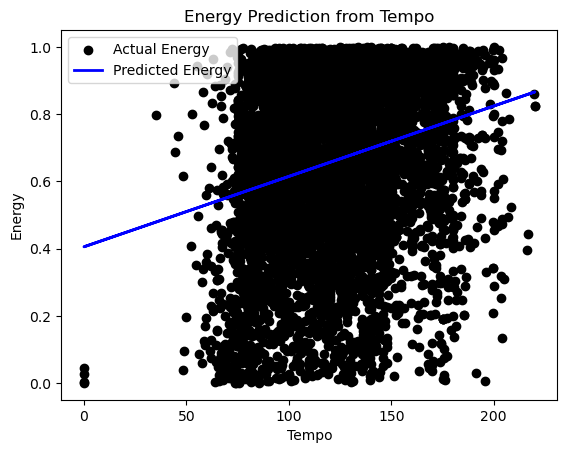

In [75]:
print("Extra Credit")

# Reshaping the tempo feature for model input and defining the target variable as energy
tempo = df_no_dups_ig['tempo'].values.reshape(-1, 1)
genre = df_no_dups_ig['energy'].values

x_train_11, x_test_11, y_train_11, y_test_11 = train_test_split(tempo, genre, test_size=0.15, random_state=10206068)

linreg = LinearRegression()
linreg.fit(x_train_11, y_train_11)

# Predicting energy levels on the test set using the trained model
energy_predictions = linreg.predict(x_test_11)

# Calculating the Mean Squared Error (MSE) and R-squared (R2) for model evaluation
mse_11 = mean_squared_error(y_test_11, energy_predictions)
r2_11 = r2_score(y_test_11, energy_predictions)

print("Mean Squared Error (MSE): " + str(mse_11))
print('R-squared (R2): ' +str(r2_11))

plt.scatter(x_test_11, y_test_11, color='black', label='Actual Energy')
plt.plot(x_test_11, energy_predictions, color='blue', linewidth=2, label='Predicted Energy')
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.title('Energy Prediction from Tempo')
plt.legend()
plt.show()